In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv("/content/energydata_complete.csv")

In [ ]:
#printing the first five rows of the data
print(df.head(5))

  recorded_timestamp  total_energy_use  lighting_energy_use  temp_sensor_1  \
0   11-01-2016 17:00                60                   30          19.89   
1   11-01-2016 17:10                60                   30          19.89   
2   11-01-2016 17:20                50                   30          19.89   
3   11-01-2016 17:30                50                   40          19.89   
4   11-01-2016 17:40                60                   40          19.89   

   humidity_sensor_1  temp_sensor_2  humidity_sensor_2  temp_sensor_3  \
0          47.596667           19.2          44.790000          19.79   
1          46.693333           19.2          44.722500          19.79   
2          46.300000           19.2          44.626667          19.79   
3          46.066667           19.2          44.590000          19.79   
4          46.333333           19.2          44.530000          19.79   

   humidity_sensor_3  temp_sensor_4  ...  Unnamed: 32  Unnamed: 33  \
0          44.730000  

In [ ]:
#printing the last five rows of the data
print(df.tail(5))

      recorded_timestamp  total_energy_use  lighting_energy_use  \
19730   27-05-2016 17:20               100                    0   
19731   27-05-2016 17:30                90                    0   
19732   27-05-2016 17:40               270                   10   
19733   27-05-2016 17:50               420                   10   
19734   27-05-2016 18:00               430                   10   

       temp_sensor_1  humidity_sensor_1  temp_sensor_2  humidity_sensor_2  \
19730      25.566667          46.560000      25.890000          42.025714   
19731      25.500000          46.500000      25.754000          42.080000   
19732      25.500000          46.596667      25.628571          42.768571   
19733      25.500000          46.990000      25.414000          43.036000   
19734      25.500000          46.600000      25.264286          42.971429   

       temp_sensor_3  humidity_sensor_3  temp_sensor_4  ...  Unnamed: 32  \
19730      27.200000          41.163333           24.7  ..

In [ ]:
#print the no of rows and columns of data
print(df.shape)

(19735, 42)


In [ ]:
#printing the statistcal measures
df.describe()

,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,humidity_sensor_4,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#removing the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
if 'vehicle_type' in df.columns:
    df.drop('vehicle_type', axis=1, inplace=True)

In [ ]:
df.shape

(19735, 29)

In [ ]:
# Convert the timestamp column to proper datetime format
if 'date' in df.columns:
    df['recorded_timestamp'] = pd.to_datetime(df['date'], dayfirst=True)
    df.drop('date', axis=1, inplace=True)
elif 'recorded_timestamp' in df.columns:
    df['recorded_timestamp'] = pd.to_datetime(df['recorded_timestamp'], dayfirst=True)
else:
    raise KeyError("Timestamp column not found. Please check column names.")

In [ ]:
#Checking the no of empty values
print("Null values:\n", df.isnull().sum())

Null values:
 recorded_timestamp      0
total_energy_use        0
lighting_energy_use     0
temp_sensor_1           0
humidity_sensor_1       0
temp_sensor_2           0
humidity_sensor_2       0
temp_sensor_3           0
humidity_sensor_3       0
temp_sensor_4           0
humidity_sensor_4       0
temp_sensor_5           0
humidity_sensor_5       0
temp_sensor_6           0
humidity_sensor_6       0
temp_sensor_7           0
humidity_sensor_7       0
temp_sensor_8           0
humidity_sensor_8       0
temp_sensor_9           0
humidity_sensor_9       0
external_temp           0
atmospheric_pressure    0
external_humidity       0
wind_speed_mps          0
visibility_km           0
dew_point_temp          0
random_variable_1       0
random_variable_2       0
dtype: int64


In [ ]:
#TimeSeries analysis-Sorts data by time, resets index for clean time-series.
df.sort_values('recorded_timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

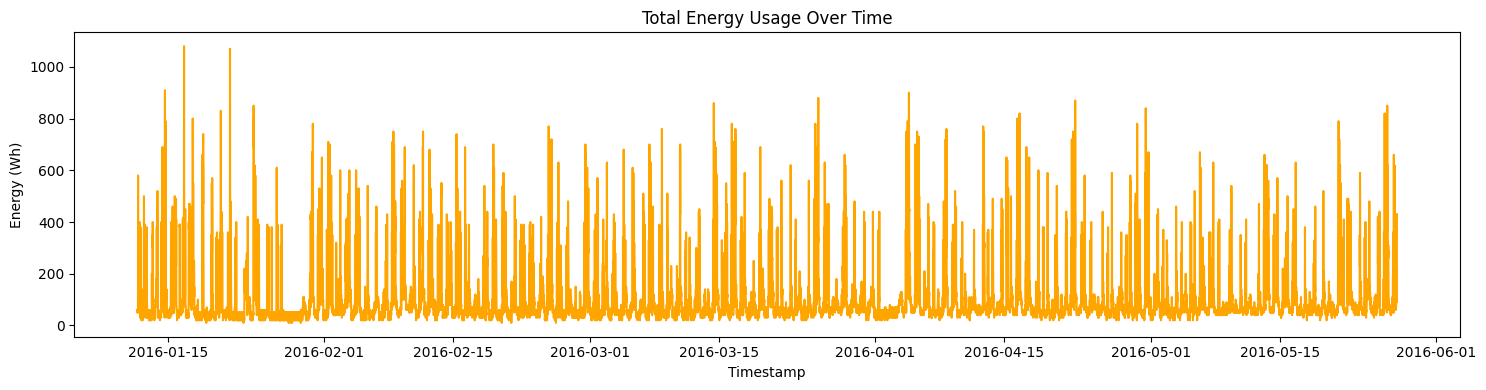

In [ ]:
# Line chart showing energy usage over time using timestamps
plt.figure(figsize=(15, 4))
plt.plot(df['recorded_timestamp'], df['total_energy_use'], color='orange')
plt.title("Total Energy Usage Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Energy (Wh)")
plt.tight_layout()
plt.show()

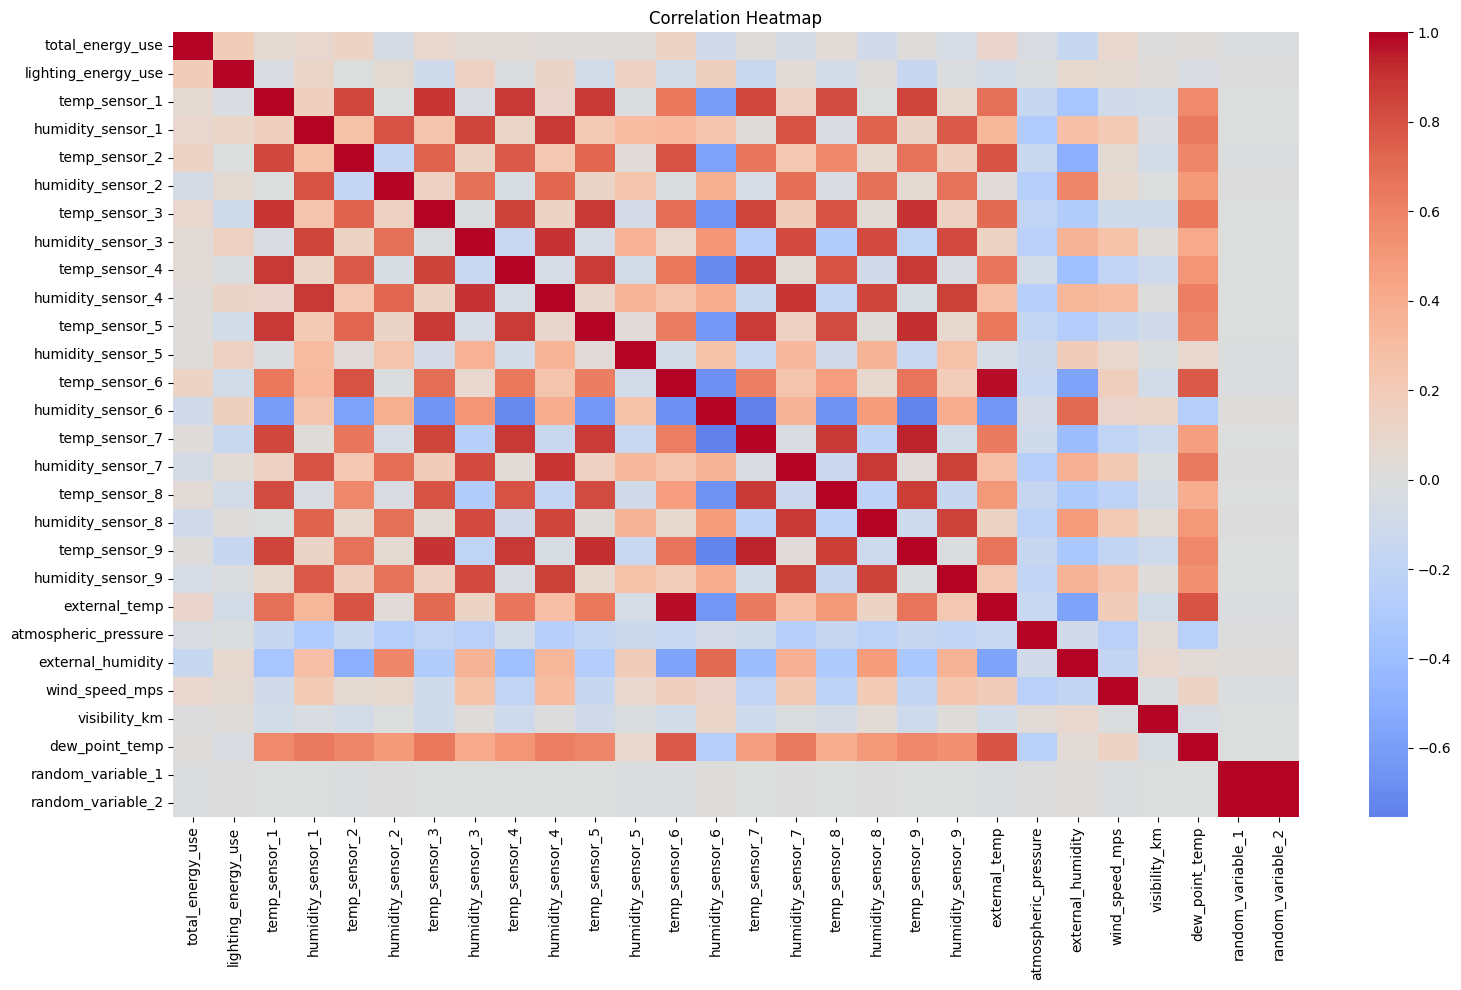

In [ ]:
# Heatmap showing feature correlations using color intensity
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

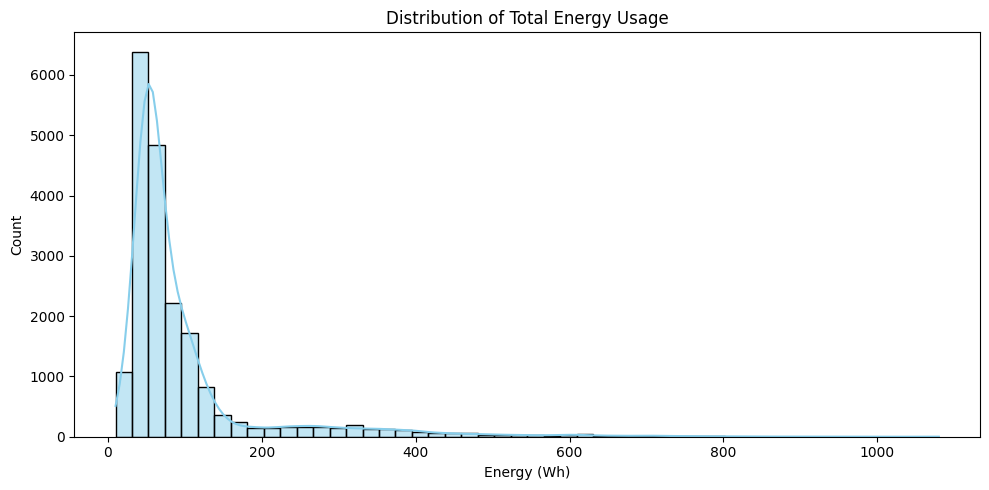

In [ ]:
# Histogram showing energy usage frequency and distribution curve
plt.figure(figsize=(10, 5))
sns.histplot(df['total_energy_use'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Total Energy Usage")
plt.xlabel("Energy (Wh)")
plt.tight_layout()
plt.show()

In [ ]:
#Extract hour and weekday from recorded timestamp for feature engineering.
df['hour'] = df['recorded_timestamp'].dt.hour
df['day_of_week'] = df['recorded_timestamp'].dt.dayofweek

In [ ]:
#Select input features and target variable for model training process.
X = df.drop(columns=['total_energy_use', 'recorded_timestamp'])
y = df['total_energy_use']

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Train, predict, and evaluate multiple regression models with metrics
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}
results = {}
def evaluate_model(name, model, X_test, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}
    print(f"\n--- {name} ---")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(name, model, X_test, y_test, y_pred)


--- Linear Regression ---
MAE  : 52.59
RMSE : 91.14
R²   : 0.1700

--- Decision Tree ---
MAE  : 44.72
RMSE : 89.51
R²   : 0.1994

--- Gradient Boosting ---
MAE  : 45.38
RMSE : 83.13
R²   : 0.3095


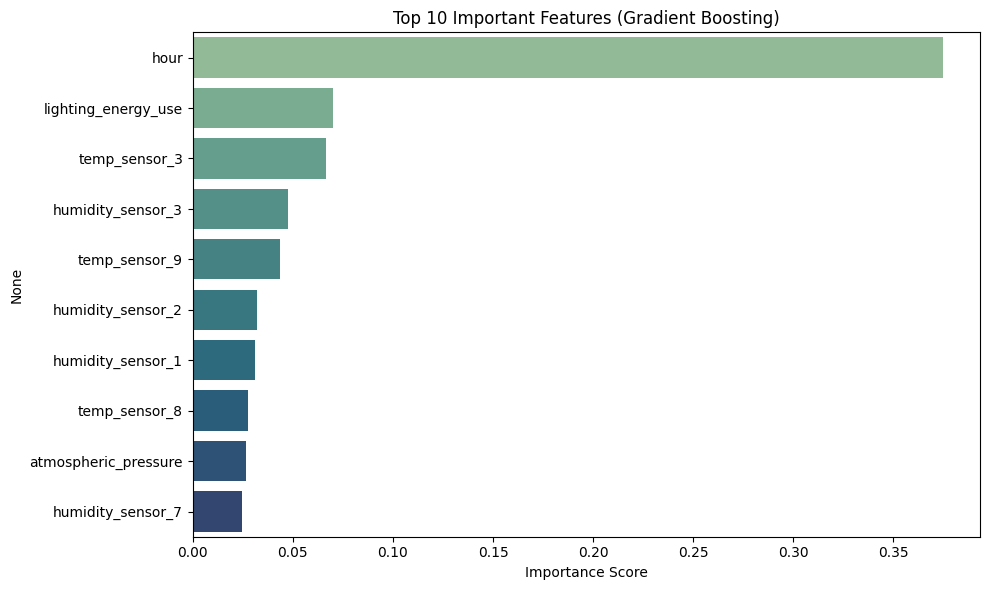

In [ ]:
#Extract and plot top 10 important features from Gradient Boosting.
gb_model = models['Gradient Boosting']
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="crest")
plt.title("Top 10 Important Features (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

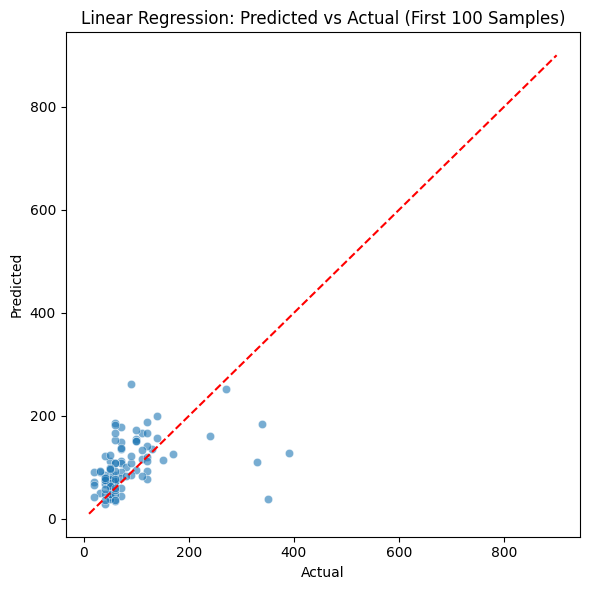

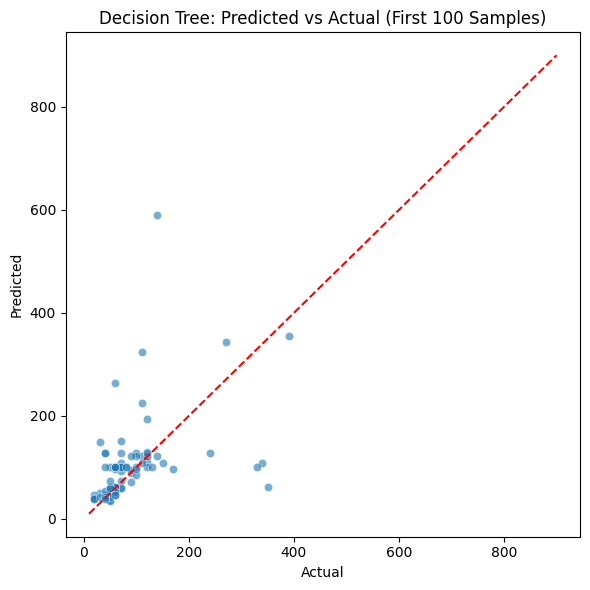

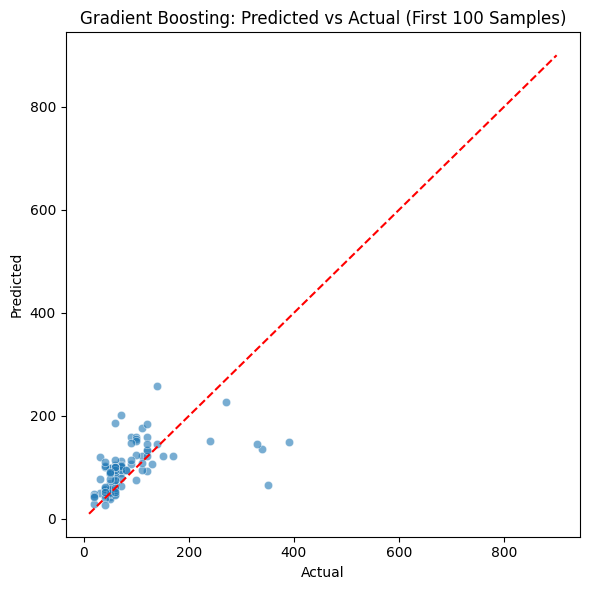

In [ ]:
#Plot actual vs predicted values for first 100 test samples.
for name, model in models.items():
    preds = model.predict(X_test)
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test[:100].values, y=preds[:100], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Predicted vs Actual (First 100 Samples)")
    plt.tight_layout()
    plt.show()

In [ ]:
# Create and display model performance summary sorted by RMSE
results_df = pd.DataFrame(results).T
print("\nModel Comparison Summary:")
print(results_df.sort_values(by='RMSE'))


Model Comparison Summary:
                         MAE       RMSE        R²
Gradient Boosting  45.380272  83.126271  0.309492
Decision Tree      44.722472  89.507964  0.199400
Linear Regression  52.588044  91.135480  0.170021
